# Generate Gaussians and look at 'em


In [2]:
%matplotlib inline
import sys, math
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rng

In [6]:
def plot_2D_Gaussian(Mu, Cov):
    print ('Covariance matrix: \n %s' % str(C))
    
    plt.subplot(121)  # plot the surface
    numsteps = 300
    x, y =np.linspace(-10,10,numsteps), np.linspace(-10,10,numsteps)
    X = np.zeros(shape=[2,numsteps,numsteps])
    X[0], X[1] = np.meshgrid(x, y, sparse=False, indexing='ij')
    invC = np.linalg.inv(Cov)
    invCX = np.tensordot(invC, X, axes=1)
    z = np.sum(X * invCX,0)
    z = np.exp(-0.5 * z)
    plt.contourf(x,y,z, cmap='jet')
    plt.axis('equal')
    
    plt.subplot(122)  # Just draw shitloads of samples
    x = rng.multivariate_normal(Mu, Cov, (1000))
    plt.plot(x[:,0], x[:,1],'.k',alpha=.2)
    plt.axis('equal')

Covariance matrix: 
 [[ 5.   4.5]
 [ 4.5  5. ]]


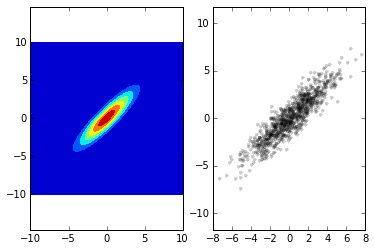

In [9]:
C = np.array([[5,4.5],[4.5,5]])
Mean = np.array([0.0,0.0])
plot_2D_Gaussian(Mean, C)

Covariance matrix: 
 [[5 3]
 [3 5]]


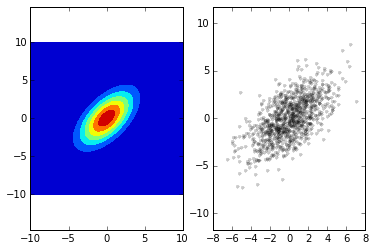

In [10]:
C = np.array([[5,3],[3,5]])
Mean = np.array([0.0,0.0])
plot_2D_Gaussian(Mean, C)

Covariance matrix: 
 [[5 0]
 [0 5]]


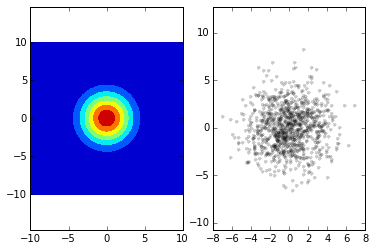

In [11]:
C = np.array([[5,0],[0,5]])
Mean = np.array([0.0,0.0])
plot_2D_Gaussian(Mean, C)